In [1]:
using Pkg
Pkg.activate("PML")

  Activating project at `/media/amirabbas/gauss/PML/code/PML`


In [4]:
# Pkg.add(["Distributions", "Turing", "StatsPlots", "Plots"])

In [5]:
using Distributions
using LinearAlgebra
using Turing
using StatsPlots

In [6]:
@model function coin_model(X)
    θ ~ Beta(1.0, 1.0)
    
    for i in 1:length(X)
        X[i] ~ Bernoulli(θ)
    end
end

coin_model (generic function with 2 methods)

In [9]:
X = [0, 0, 1, 0, 0, 0, 0]

chain = sample(coin_model(X), NUTS(), 30000)

┌ Info: Found initial step size
└   ϵ = 1.7000000000000002
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (30000×13×1 Array{Float64, 3}):

Iterations        = 1001:1:31000
Number of chains  = 1
Samples per chain = 30000
Wall duration     = 0.85 seconds
Compute duration  = 0.85 seconds
parameters        = θ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse     ess_bulk     ess_tail      rhat ⋯
      Symbol   Float64   Float64   Float64      Float64      Float64   Float64 ⋯

           θ    0.2207    0.1308    0.0011   13329.1311   15209.4527    1.0000 ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           θ    0.0319    0.1194    0.2002    0.3003    0.5249


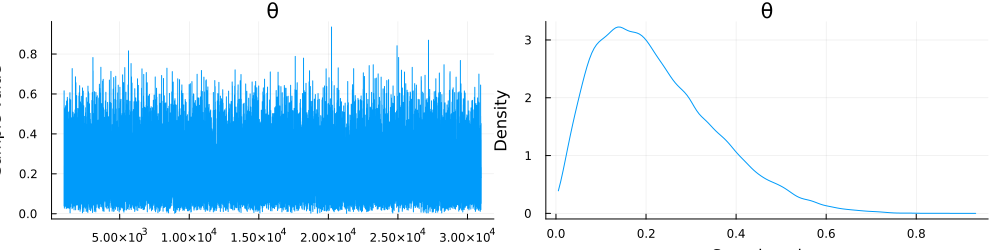

In [44]:
plot(chain)